In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import pdtypes
from pyskim import skim
import matplotlib.pylab as plt


In [6]:
rm_df = pd.read_csv('RidingMowers.csv')
rm_df

,Income,Lot_Size,Ownership
,<float64>,<float64>,<object>
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner
5,110.1,19.2,Owner
6,108.0,17.6,Owner
7,82.8,22.4,Owner
8,69.0,20.0,Owner


In [9]:
sns.set_theme()
plt.rc('font',family='Malgun Gothic')

In [10]:
rm_df.head()

,Income,Lot_Size,Ownership
,<float64>,<float64>,<object>
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [15]:
rm_df1 = (rm_df
          .groupby('Ownership')
          .agg({'Income' : 'mean',
                'Lot_Size' : 'mean'})          
          .reset_index()
)
rm_df1

,Ownership,Income,Lot_Size
,<object>,<float64>,<float64>
0,Nonowner,57.566667,17.633333
1,Owner,79.641667,20.266667


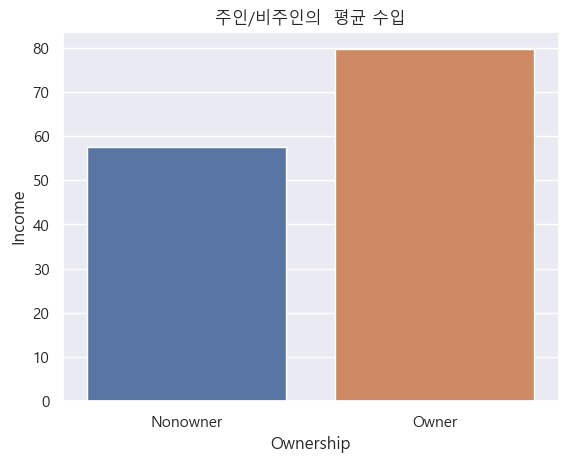

In [19]:
g = sns.barplot(rm_df1, x='Ownership', y='Income')
g.set_title('주인/비주인의  평균 수입')
plt.show()

In [20]:
rm_df.head()

,Income,Lot_Size,Ownership
,<float64>,<float64>,<object>
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [21]:
#skim 통계치, 행수 열수등 알 수있다.
skim(rm_df)

── Data Summary ────────────────────────────────────────────────────────────────────────────────────
type                 value
-----------------  -------
Number of rows          48
Number of columns        3
──────────────────────────────────────────────────
Column type frequency:
           Count
-------  -------
float64        2
object         1

── Variable type: number ───────────────────────────────────────────────────────────────────────────
    name        na_count    mean    sd    p0    p25    p50    p75    p100  hist
--  --------  ----------  ------  ----  ----  -----  -----  -----  ------  ----------
 0  Income             0    68.6  19.7    33   53     64.8   83.1   112    ▂▃▇▇▅▂▇▂▁▃
 1  Lot_Size           0    18.9   2.4    14   17.5   19     20.8    23.6  ▄▁▆▇▄▆▆▇▄▂

── Variable type: object ───────────────────────────────────────────────────────────────────────────
    name         na_count    n_unique  top_counts
--  ---------  ----------  ----------  ------------------

In [26]:
#y 값인 Ownership 을 없앰. axis = 1: 컬럼, axis = 0: 행
#X,y값 분리 

X = rm_df.drop('Ownership', axis=1) #데이터프레임
y = rm_df['Ownership']  #판다스 시리즈
X.head()

,Income,Lot_Size
,<float64>,<float64>
0,60.0,18.4
1,85.5,16.8
2,64.8,21.6
3,61.5,20.8
4,87.0,23.6


In [27]:
# 분류의 class가 1:1의 데이터 owner:nonowner 데이터 비율이 정확히 1:1 비현실적.
# 데이터를 비현실적으로 만들어주기. 나누기.
# 테스트 데이터는 모르는 값이라 정해야한다 - > 실전에 부딪히는 데이터임.
# 트레인데이터와 테스트 데이터로 나눠야함.
# 대문자 X -> x1, x2 등등 여러 컬럼, 피쳐, y는 결과값 소문자.
# 학습용데이터로 나누기위해 데이터를 서로 섞어야함. 셔플. (y값이 무작위순이 되게.)
# 80%를 트레인, 20%를 Test용으로 사용.
# 데이터 분할 4개로 나눔. Train X, Train Y, Test X, Test y


ERROR: Could not find a version that satisfies the requirement train_test_split (from versions: none)
ERROR: No matching distribution found for train_test_split


In [28]:
#트레인 x,y 테스트 x,y 나누기

from sklearn.model_selection import train_test_split #사이킷러닝 scikit learn

# 테스트 데이터는 20%, 셔플로 섞다. 랜덤 시드 random state -> 랜덤시드 숫자를 준다. stratify : 층화표본추출
# 층화 : owner/nonowner의 비율이 데이타는 1:1인데 실제 데이타는 그렇지 않을 수 있다. 그 비율을 트레인데이타도 0.7:0.3, 테스트데이타도 0.7:0.3 등의 비율로 유지하고 싶을 때 사용.
# stratify에 y컬럼을 사용한다고 지정하는 것. 0.7:0.3 -> 무조건 해주는 것이 좋다.
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                 random_state=1, shuffle=True,
                 stratify=y)




In [30]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(38, 2)
(38,)
(10, 2)
(10,)


In [32]:
# 테스트는 쓰지 않고 트레인만 씀, 나중에 결정을 고려할 때 테스트를 사용하는 것.
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [33]:
y_train

21       Owner
19       Owner
13       Owner
41    Nonowner
11       Owner
1        Owner
42    Nonowner
7        Owner
0        Owner
40    Nonowner
30    Nonowner
10       Owner
20       Owner
27    Nonowner
3        Owner
22       Owner
37    Nonowner
24    Nonowner
46    Nonowner
43    Nonowner
12       Owner
25    Nonowner
39    Nonowner
8        Owner
45    Nonowner
31    Nonowner
6        Owner
5        Owner
44    Nonowner
16       Owner
23       Owner
47    Nonowner
2        Owner
34    Nonowner
38    Nonowner
28    Nonowner
15       Owner
26    Nonowner
Name: Ownership, dtype: object

In [36]:
# x값에는 수치가 와야함, y는 글자데이터임 -> y의 값을 숫자로 바꿔야함. y축의 값을 label이라 부름. 
#머신러닝을 위한 전처리임 모두 숫자로 바꾸기
# x값을 가지고 계산을 하는 것임.

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder() #labelEncoder 객체 생성 (레이블을 숫자로 인코딩)
#class_le.fit(y_train) # 머신러닝의 fit : 룰을 뽑아낸다. (규칙을 찾아내는 것: 숫자로 바꾸는 규칙 Owner:1, NonWoner:0으로 바꾸는 규칙)

#y_train = class_le.transform(y_train) # fit으로 찾은 규칙을 transform으로 적용시킴.

y_train = class_le.fit_transform(y_train) # 규칙, 적용 동시에 한번에 함.

y_test = class_le.transform(y_test) #fit을 안함. 테스트 데이터는 규칙을 적용안함. 


y_train 

# 머신러닝용 전처리 완료.

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [37]:
# 디시전 트리의 분류용 (리그레서-> 회귀용) 분류:회귀용으로 모두 사용가능
# 학습 데이터 이용 실제 학습

from sklearn.tree import DecisionTreeClassifier

# 디시전 트리
tree = DecisionTreeClassifier(max_depth=1, random_state=1) # 하이퍼파라미터 설정 depth:1 한단계질문으로 마침, random:하이퍼파라미터아님.
tree.fit(X_train, y_train) # 학습 시작 (분류)

# 회귀의 경우는 a,b의 파라미터를 찾는게 목표 : 회귀

DecisionTreeClassifier(max_depth=1, random_state=1)

In [39]:
# y 값은 1차원 배열, 판다스 시리즈 가능함. 사이킷러닝에서 사용이 가능하게 됨. (판다스 시리즈)

# 학습결과보기
# fit해서 모델이 나옴. 알고리즘 학습 결과, tree안에 들어있다.

tree.score(X_train, y_train) # 정확도 알려주는 함수 score, tree: 모델임. 73% 학습이 됨.  (제한 depth=1임.)


0.7368421052631579

In [48]:
tree = DecisionTreeClassifier(max_depth=1, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=1)

In [50]:
tree.score(X_train, y_train) #depth 10 100프로 완료

0.7368421052631579

In [51]:
tree.score(x_test,y_test) # accuracy 함수 호출

0.8

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion_matrix : 혼돈행렬

y_predic = tree.predict(x_test)

confusion_matrix(y_test, y_predic)


array([[4, 1],
       [1, 4]], dtype=int64)

In [55]:
# K 폴드 교차검증 
from sklearn.model_selection import GridSearchCV, train_test_split

# 하이퍼파라미터 찾는 것.
# min_sample_leaf (하이퍼파라미터) 설정 : 과적합 막는 것. 최소 샘플 리프값으로 들어맞으면 성장하지 않게. tree off시켜줌.
# max _depth : 과적합이 될 가능성 높음
# 트레이닝 과적합과의 싸움임.


# param_grid 정의
param_grid = [{'max_depth' : [1,2,3,4,5,6,7,8,9,10],
               'min_samples_leaf' : [10,20,30,40,50]}] # 총50개 그리드에 대한 검증 각 하나에대해 10개(cv)를 수행. for, for 두번.

gs = GridSearchCV(estimator=DecisionTreeClassifier(),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10, # cross validation : 10가지 경우에 대한 검증데이터.
                  n_jobs=1)

gs.fit(X_train, y_train) #fit된 내용이 gs에 들어가있음.




GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [10, 20, 30, 40, 50]}],
             scoring='accuracy')

In [56]:
gs.best_params_


{'max_depth': 1, 'min_samples_leaf': 10}

In [57]:
gs.best_score_

0.55

In [58]:
#random forest 실습

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=500,
                                  random_state=1) #디시전트리의 개수 500개, 피쳐를 랜덤하게 가져오는데 그때 쓰는 씨드

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [59]:
rf_model.score(x_test, y_test)

1.0

In [60]:
param_grid = [{'n_estimators' : [100,200,300,400],
               'min_samples_leaf' : [10,20,30,40,50]}] # 총50개 그리드에 대한 검증 각 하나에대해 10개(cv)를 수행. for, for 두번.

gs = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10, # cross validation : 10가지 경우에 대한 검증데이터.
                  n_jobs=1)

gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid=[{'min_samples_leaf': [10, 20, 30, 40, 50],
                          'n_estimators': [100, 200, 300, 400]}],
             scoring='accuracy')

In [61]:
gs.best_params_


{'min_samples_leaf': 10, 'n_estimators': 300}

In [62]:
gs.best_score_

0.6666666666666667